In [29]:
import mediapipe as mp
import sklearn
import cv2
import os
import time
import matplotlib.pyplot as plt
import pickle

In [2]:
print(f"MediaPipe version: {mediapipe.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"OpenCV version: {cv2.__version__}")

MediaPipe version: 0.10.21
Scikit-learn version: 1.7.2
OpenCV version: 4.11.0


<font size= 6><b> Dataset Generation

<b>Before we start training we need to create first a dataset of the filipino sign language

So basically here are the fsl image we need to train at the moment:
1. Hi
2. Kamusta
3. Ka
4. Salamat
5. Mahal Kita
6. Oo
7. Hindi

In [5]:
labels = ["Hi", "Salamat", "Kamusta", "Ka", "MahalKita", "Oo", "Hindi"]
number_images = 60


def dataset_creation(label, size, output_path='dataset'):
    label_path = os.path.join(output_path, label)
    os.makedirs(label_path, exist_ok=True)

    cap = cv2.VideoCapture(0)
    print(f"Collecting images for '{label}' — press SPACE to capture, 'q' to quit")
    time.sleep(3)

    count = 0
    while count < size:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame. Exiting...")
            break


        cv2.putText(frame, f"Count: {count}/{size}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
  
        
        cv2.imshow("Data Collection", frame)
        key = cv2.waitKey(1) & 0xFF

        if key == ord(' '): 

            imgname = os.path.join(label_path, f"{count}.jpg")
            cv2.imwrite(imgname, frame)
            
            # FIX 4: Changed 'number_imgs' to 'size' (to match the function parameter)
            print(f"Captured image {count + 1}/{size}")
            count += 1

        elif key == ord('q'):
            print("Skipping current label...")
            break

    cap.release()
    cv2.destroyAllWindows()


for label in labels:
    dataset_creation(label, size=number_images)



Captured image 1/60
Captured image 2/60
Captured image 3/60
Captured image 4/60
Captured image 5/60
Captured image 6/60
Captured image 7/60
Captured image 8/60
Captured image 9/60
Captured image 10/60
Captured image 11/60
Captured image 12/60
Captured image 13/60
Captured image 14/60
Captured image 15/60
Captured image 16/60
Captured image 17/60
Captured image 18/60
Captured image 19/60
Captured image 20/60
Captured image 21/60
Captured image 22/60
Captured image 23/60
Captured image 24/60
Captured image 25/60
Captured image 26/60
Captured image 27/60
Captured image 28/60
Captured image 29/60
Captured image 30/60
Captured image 31/60
Captured image 32/60
Captured image 33/60
Captured image 34/60
Captured image 35/60
Captured image 36/60
Captured image 37/60
Captured image 38/60
Captured image 39/60
Captured image 40/60
Captured image 41/60
Captured image 42/60
Captured image 43/60
Captured image 44/60
Captured image 45/60
Captured image 46/60
Captured image 47/60
Captured image 48/60
C

<font size = 6><b>Check the dataset

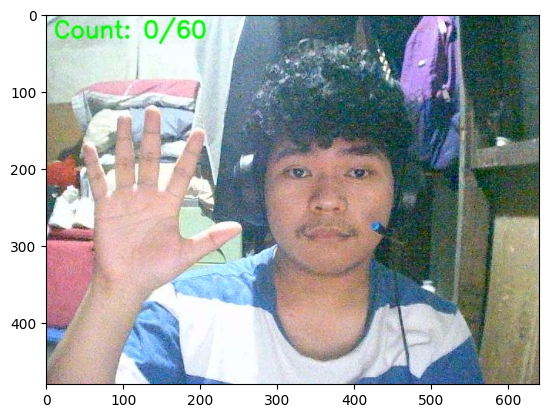

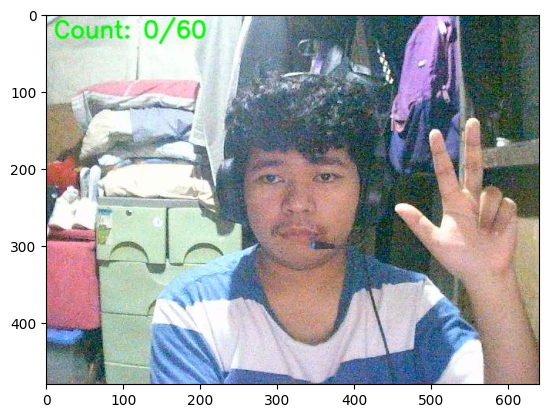

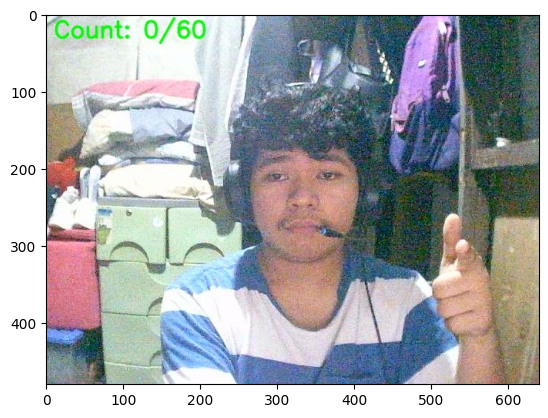

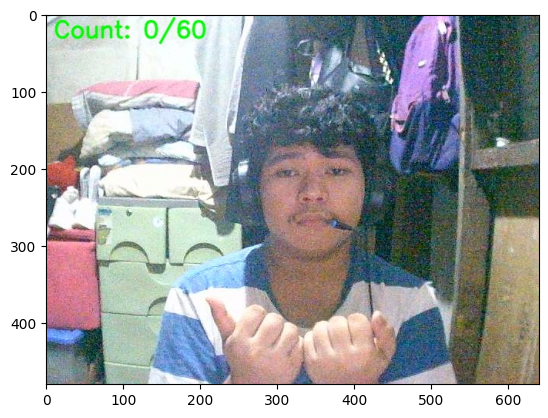

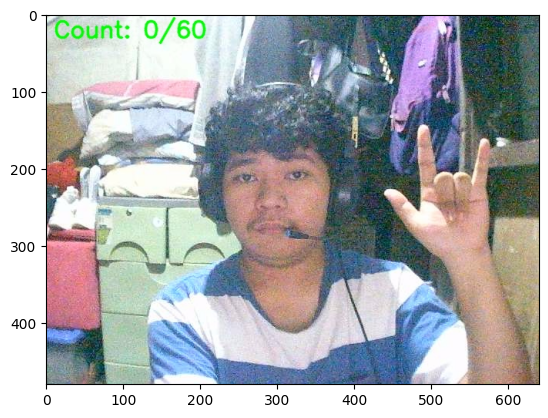

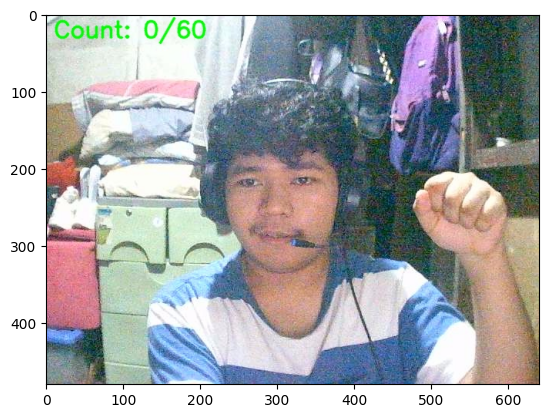

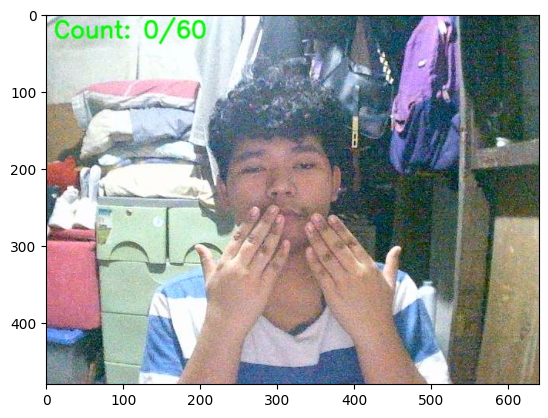

In [14]:
directory = "Desktop/Emtech_Final_Project/dataset"

for dir in os.listdir(directory):
    for img_path in os.listdir(os.path.join(directory, dir))[:1]:
        img = cv2.imread(os.path.join(directory, dir, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure()
        plt.imshow(img_rgb)

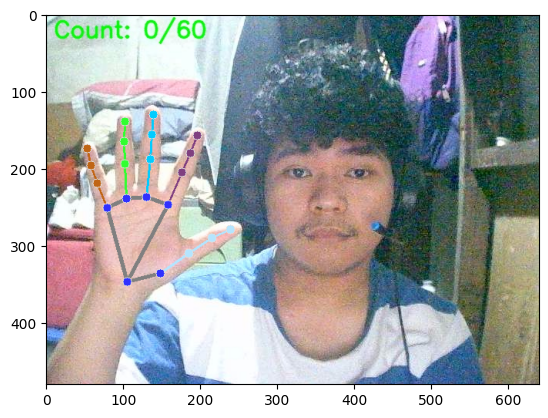

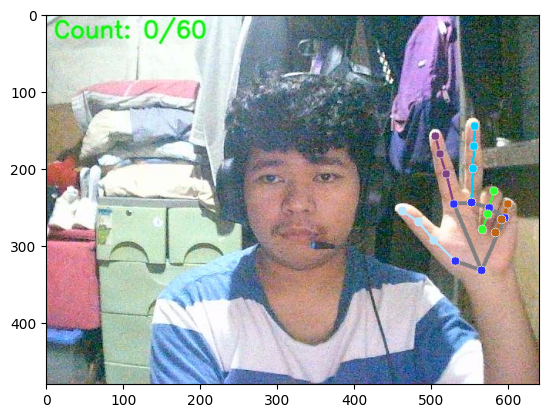

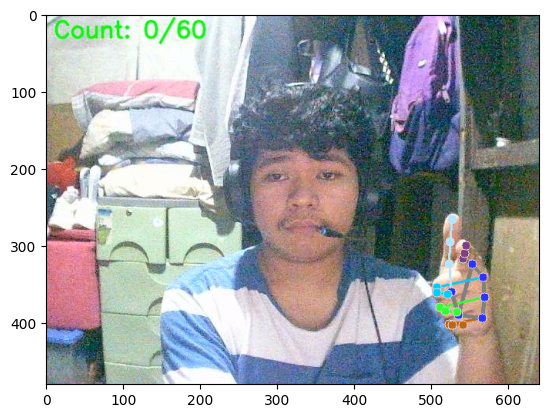

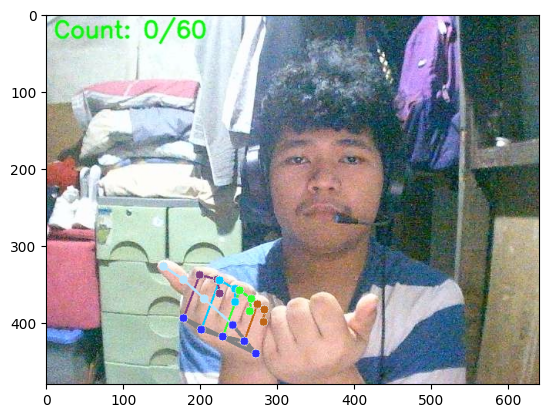

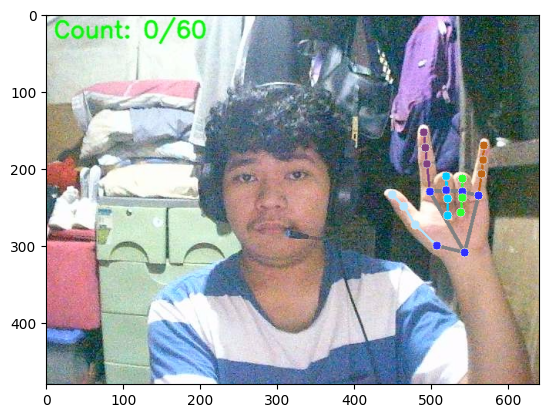

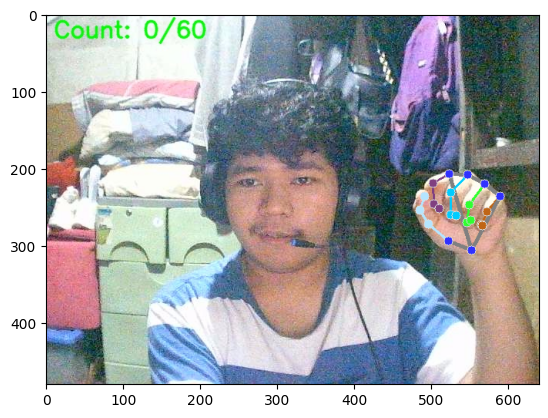

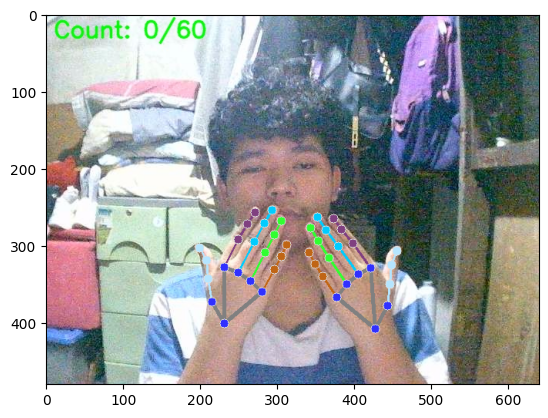

In [25]:
directory = "Desktop/Emtech_Final_Project/dataset"

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

for dir in os.listdir(directory):
    for img_path in os.listdir(os.path.join(directory, dir))[:1]:
        img = cv2.imread(os.path.join(directory, dir, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style()
                )

        plt.figure()
        plt.imshow(img_rgb)

In [22]:

number_images = 60


def dataset_creation(label, size, output_path='IDK'):
    label_path = os.path.join(output_path, label)
    os.makedirs(label_path, exist_ok=True)

    cap = cv2.VideoCapture(0)
    print(f"Collecting images for '{label}' — press SPACE to capture, 'q' to quit")
    time.sleep(3)

    count = 0
    while count < size:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame. Exiting...")
            break


        cv2.putText(frame, f"Count: {count}/{size}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
  
        
        cv2.imshow("Data Collection", frame)
        key = cv2.waitKey(1) & 0xFF

        if key == ord(' '): 

            imgname = os.path.join(label_path, f"{count}.jpg")
            cv2.imwrite(imgname, frame)
            
            # FIX 4: Changed 'number_imgs' to 'size' (to match the function parameter)
            print(f"Captured image {count + 1}/{size}")
            count += 1

        elif key == ord('q'):
            print("Skipping current label...")
            break

    cap.release()
    cv2.destroyAllWindows()



dataset_creation("Kamusta", size=number_images)



Captured image 1/60
Captured image 2/60
Captured image 3/60
Captured image 4/60
Captured image 5/60
Captured image 6/60
Captured image 7/60
Captured image 8/60
Captured image 9/60
Captured image 10/60
Captured image 11/60
Captured image 12/60
Captured image 13/60
Captured image 14/60
Captured image 15/60
Captured image 16/60
Captured image 17/60
Captured image 18/60
Captured image 19/60
Captured image 20/60
Captured image 21/60
Captured image 22/60
Captured image 23/60
Captured image 24/60
Captured image 25/60
Captured image 26/60
Captured image 27/60
Captured image 28/60
Captured image 29/60
Captured image 30/60
Captured image 31/60
Captured image 32/60
Captured image 33/60
Captured image 34/60
Captured image 35/60
Captured image 36/60
Captured image 37/60
Captured image 38/60
Captured image 39/60
Captured image 40/60
Captured image 41/60
Captured image 42/60
Captured image 43/60
Captured image 44/60
Captured image 45/60
Captured image 46/60
Captured image 47/60
Captured image 48/60
C

In [42]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# --- 2. We explicitly ask for 2 hands ---
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

# --- 3. Corrected file path ---
directory = os.path.expanduser("~/Desktop/Emtech_Final_Project/dataset")

data = []
labels = []

print(f"Starting processing for directory: {directory}")

for dir_lab in os.listdir(directory):
    dir_path = os.path.join(directory, dir_lab)
    
    if not os.path.isdir(dir_path):
        continue

    print(f"Processing label: {dir_lab}")
    for img_path in os.listdir(dir_path):
        full_img_path = os.path.join(dir_path, img_path)
        
        img = cv2.imread(full_img_path)
        
        if img is None:
            print(f"Warning: Could not read image {full_img_path}. Skipping.")
            continue
            
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        
        # --- 4. THIS IS THE CRITICAL FIX ---
        data_container = [] # Reset for each image
        if results.multi_hand_landmarks:
            
            # Process the first hand
            hand1 = results.multi_hand_landmarks[0]
            for i in range(len(hand1.landmark)):
                x = hand1.landmark[i].x
                y = hand1.landmark[i].y
                data_container.append(x)
                data_container.append(y)
                
            if len(results.multi_hand_landmarks) == 2:
                # Process the second hand if it exists
                hand2 = results.multi_hand_landmarks[1]
                for i in range(len(hand2.landmark)):
                    x = hand2.landmark[i].x
                    y = hand2.landmark[i].y
                    data_container.append(x)
                    data_container.append(y)
            else:
                # If only one hand, pad with 42 zeros for the second hand
                data_container.extend([0.0] * 42) # 21 landmarks * 2 (x,y)
                
            # Now, data_container is *always* 84 items long
            data.append(data_container)
            labels.append(dir_lab)
        
        else:
            # No hands were detected in this image. Skip it.
            print(f"Warning: No hands detected in {full_img_path}. Skipping.")

print("---------------------")
print("Finished processing all images.")

# Use the full, correct path to save the file
output_filename = os.path.expanduser("~/Desktop/Emtech_Final_Project/data.pickle")
print(f"Saving data to {output_filename}...")

with open(output_filename, 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)

print("Save complete!")
print(f"Total samples (images with hands) processed: {len(data)}")

Starting processing for directory: C:\Users\kurt/Desktop/Emtech_Final_Project/dataset
Processing label: Hi
Processing label: Hindi
Processing label: Ka
Processing label: Kamusta
Processing label: MahalKita
Processing label: Oo
Processing label: Salamat
---------------------
Finished processing all images.
Saving data to C:\Users\kurt/Desktop/Emtech_Final_Project/data.pickle...
Save complete!
Total samples (images with hands) processed: 411


TRAIN

CHECK WHAT DOES THE DATA LOOK LIKE

In [43]:
data_dict = pickle.load(open("Desktop/Emtech_Final_Project/data.pickle",'rb'))

print(data_dict.keys())
print(data_dict)

dict_keys(['data', 'labels'])
{'data': [[0.16519047319889069, 0.7235861420631409, 0.23188292980194092, 0.7012689113616943, 0.28920719027519226, 0.6475133895874023, 0.3364936411380768, 0.6043046116828918, 0.374237060546875, 0.5817962884902954, 0.24778109788894653, 0.515020489692688, 0.2760995626449585, 0.4291456937789917, 0.29374924302101135, 0.37547731399536133, 0.3072752058506012, 0.32911065220832825, 0.20465274155139923, 0.49495992064476013, 0.21094173192977905, 0.3923349678516388, 0.21549898386001587, 0.3262530267238617, 0.21802833676338196, 0.272488534450531, 0.16291870176792145, 0.4995192289352417, 0.16025462746620178, 0.40494227409362793, 0.15935933589935303, 0.34414106607437134, 0.1598483920097351, 0.2915480136871338, 0.1238873153924942, 0.5246303081512451, 0.10447399318218231, 0.4570762515068054, 0.09103819727897644, 0.4096991717815399, 0.08283035457134247, 0.3640451431274414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

<b>NOW WE TRAIN IT

In [45]:
data_dict = pickle.load(open("Desktop/Emtech_Final_Project/data.pickle",'rb'))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

data = np.array(data_dict['data'])
labels = np.array(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size = 0.2, random_state = 42, stratify = labels)

RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred = RF.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          Hi       1.00      0.92      0.96        12
       Hindi       1.00      0.92      0.96        12
          Ka       1.00      0.83      0.91        12
     Kamusta       1.00      1.00      1.00        11
   MahalKita       0.85      0.92      0.88        12
          Oo       0.85      0.92      0.88        12
     Salamat       0.86      1.00      0.92        12

    accuracy                           0.93        83
   macro avg       0.94      0.93      0.93        83
weighted avg       0.93      0.93      0.93        83



In [47]:
with open('model.p', 'wb') as f:
    pickle.dump({'model': RF}, f) 

print("Trained model saved successfully in a dictionary!")

Trained model saved successfully in a dictionary!


In [2]:
import cv2
import mediapipe as mp
import pickle
import numpy as np
import os  # <-- FIX 1: Added 'os' import

# --- FIX 1: Use 'os.path.expanduser' to get correct file path ---
file_path = os.path.expanduser("~/Desktop/Emtech_Final_Project/model.p")

# Handle how the model was saved
try:
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    if isinstance(data, dict):
        model = data['model'] # If you saved it as {'model': RF}
    else:
        model = data # If you saved just the RF object
except FileNotFoundError:
    print(f"Error: Model file not found at {file_path}")
    exit()
except (KeyError, TypeError):
    print("Error: Model file is not in the expected format. Please re-save your model.")
    exit()


cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.3)

# --- FIX 2: Removed 'labels_dict' ---
# The model predicts the string (e.g., "Hi") directly.

while True:
    data_container = []
    ret, frame = cap.read()

    # Flip the frame horizontally for a natural, mirror-like view
    frame = cv2.flip(frame, 1)

    if not ret:
        print("Error: Failed to grab frame. Exiting...")
        break
    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    results = hands.process(frame_rgb)
    
    predicted_fsl = "" # Default text when no hand is detected

    # --- FIX 3: Prediction logic MUST be inside this 'if' block ---
    if results.multi_hand_landmarks:
        # Draw landmarks
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks, # Must match the loop variable
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )
        
        # --- Data extraction (Your logic here was correct) ---
        hand1 = results.multi_hand_landmarks[0]
        for i in range(len(hand1.landmark)):
            x = hand1.landmark[i].x
            y = hand1.landmark[i].y
            data_container.append(x)
            data_container.append(y)
            
        if len(results.multi_hand_landmarks) == 2:
            # Process the second hand if it exists
            hand2 = results.multi_hand_landmarks[1]
            for i in range(len(hand2.landmark)):
                x = hand2.landmark[i].x
                y = hand2.landmark[i].y
                data_container.append(x)
                data_container.append(y)
        else:
            # If only one hand, pad with 42 zeros for the second hand
            data_container.extend([0.0] * 42) # 21 landmarks * 2 (x,y)
        
        # --- Prediction (Safely inside the 'if' block) ---
        prediction = model.predict([np.array(data_container)])
        
        # --- Get the predicted string directly ---
        predicted_fsl = prediction[0]

    # --- ADDED: Draw the prediction on the screen ---
    # This is outside the 'if' block, so it always runs
    # It will draw the 'predicted_fsl' string (or "" if no hands)
    cv2.putText(frame, predicted_fsl, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    cv2.imshow("frames", frame)

    # Quit with 'q'
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()